<a href="https://colab.research.google.com/github/AlexandrosMaragkakis/uni_ml_projects/blob/main/iris_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification on the iris dataset
Notes:
I have included the parameter 'random_state=7' wherever it is possible, so that the notebook produces always the same results. 

---

### Import libraries

In [73]:
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt

### Load the iris dataset

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Print some more information about the contents of the dataset

In [3]:
iris.data.shape
iris.target.shape
iris.target_names
iris.feature_names

print(f"Data shape: {iris.data.shape}")
print(f"Target shape: {iris.target.shape}")
print(f"Target names: {iris.target_names}")
print(f"Feature names: {iris.feature_names}")

Data shape: (150, 4)
Target shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Load the data into a DataFrame 

In [4]:
# Set floating point precision
pd.set_option('display.precision', 2)

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add column with the target label
iris_df['species'] = [iris.target_names[i] for i in iris.target]

#### Print the first 5 rows

In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Print some descriptive statistics:

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### Descriptive statistics for the target column

In [7]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

### Plot the data using a pairplot

From the pairplot below we can guess that the features 'petal width' and 'petal length' will help the algorithms distinguish the 3 species more easily. The sepal features have similar distributions of values, so it is harder to distinguish any species.

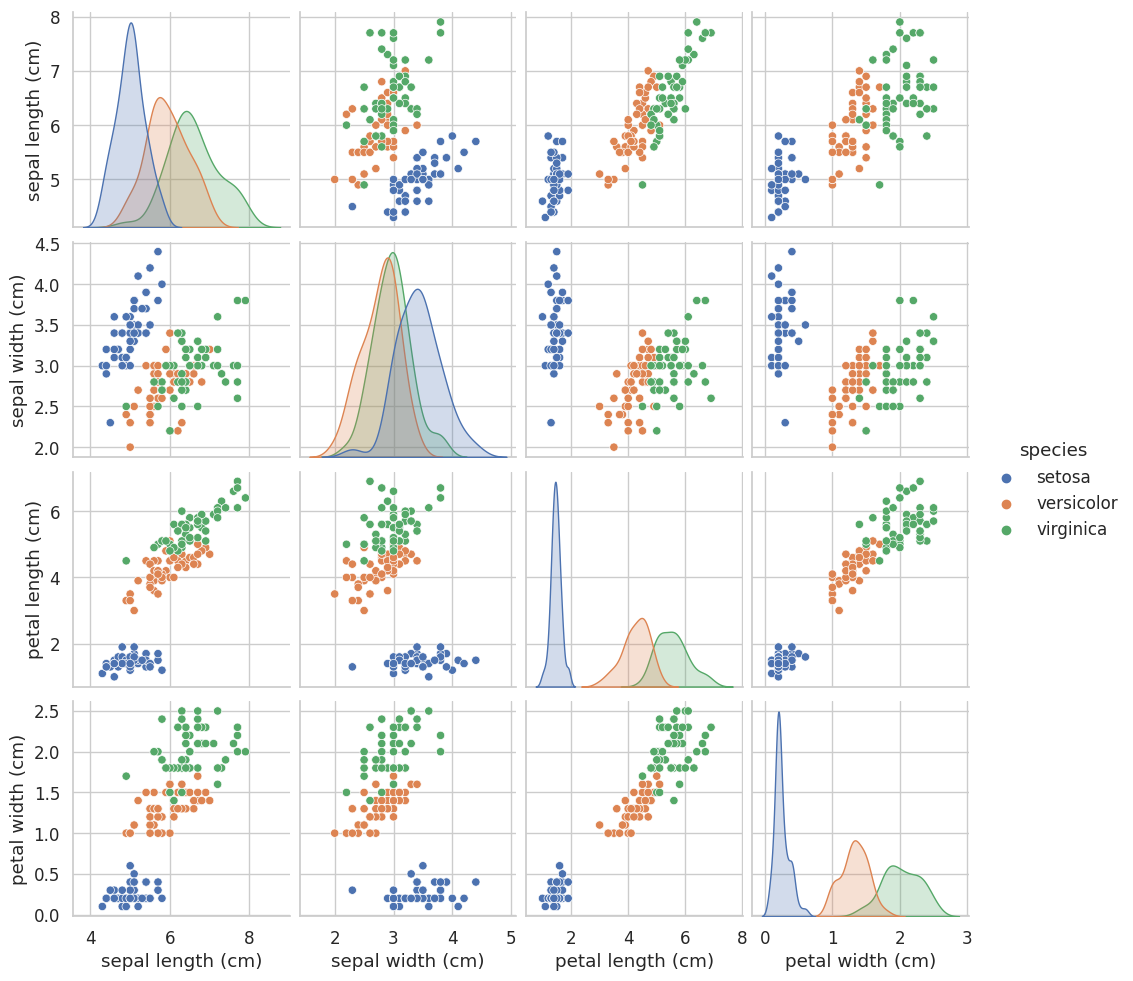

In [8]:
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
     hue='species')

---


### Classification using DecisionTreeClassifier, with criterion='entropy', which essentially is the algorithm C4.5 or J48, as explained by the [sklearn documentation](https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart).
We also test the quality of the model with the metrics Accuracy, Precision, Recall, F1 score. And because this is a multi-label problem, these metrics, except accuracy, need the parameter average=micro/macro/weighted/sample to be set. More on this [here](https://scikit-learn.org/stable/modules/model_evaluation.html#from-binary-to-multiclass-and-multilabel).

The algorithm produces different results from time to time, and by analyzing the results I found out that this happens because sometimes the classifier assigns different importance percentage on the features.

In [57]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=7)


tree1 = DecisionTreeClassifier(criterion='entropy', random_state=7) 

tree1.fit(X=X_train, y=y_train)

y_pred = tree1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# precision recall and f1 produce different results each time
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
    
print('Results: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

Results: 
Accuracy: 0.9000
Precision: 0.9141
Recall: 0.9141
F1 score: 0.9130


## Visualizing the tree

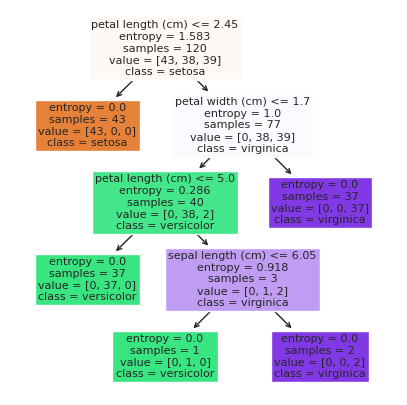

In [70]:
plt.figure(figsize=(5,5))
_ = plot_tree(tree1, feature_names=iris.feature_names,  class_names=iris.target_names, filled=True)

### Print each feature's importance, as assigned from the algorithm

In [11]:
feature_importances1 = sorted(list(zip(tree1.feature_importances_, iris.feature_names)), reverse=True)
print(feature_importances1)

[(0.640477815794262, 'petal length (cm)'), (0.34501862026324126, 'petal width (cm)'), (0.014503563942496644, 'sepal length (cm)'), (0.0, 'sepal width (cm)')]


### Visualize the feature importance using a barplot:

Text(0.5, 1.0, 'Feature Importance')

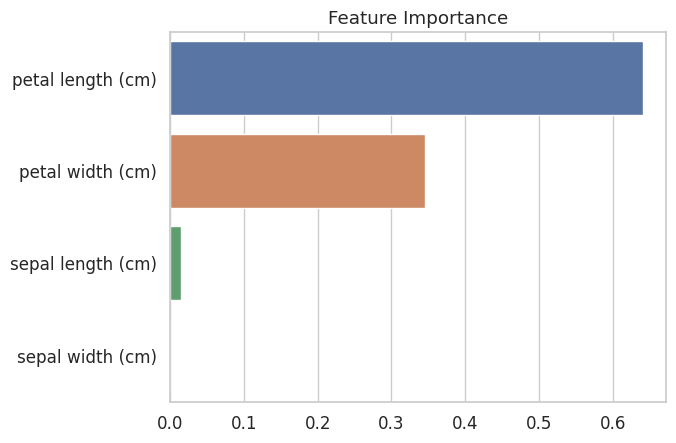

In [12]:
feature_importances = sorted(list(zip(tree1.feature_importances_, iris.feature_names)), reverse=True)
x = [f[0] for f in feature_importances1]
y_ = [f[1] for f in feature_importances1]

sns.barplot(x=x,y=y_)
plt.title('Feature Importance')

### Make a new dataset containing only the petal features

In [13]:
iris_df_no_sepal_width_or_length = iris_df.drop(['sepal width (cm)', 'sepal length (cm)','species'], axis=1)
iris_df_no_sepal_width_or_length

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### We are going to use the same process as previously

In [52]:
X, y = iris_df_no_sepal_width_or_length, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=7)


tree2 = DecisionTreeClassifier(criterion='entropy')

tree2.fit(X=X_train, y=y_train)

y_pred = tree2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# precision recall and f1 produce different results each time
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
    
print('Results: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

Results: 
Accuracy: 0.8667
Precision: 0.8838
Recall: 0.8838
F1 score: 0.8838


### Make a list with the petal features

In [15]:
less_features = list(iris.feature_names)
less_features.remove('sepal length (cm)')
less_features.remove('sepal width (cm)')
less_features

['petal length (cm)', 'petal width (cm)']

### Visualizing the new tree

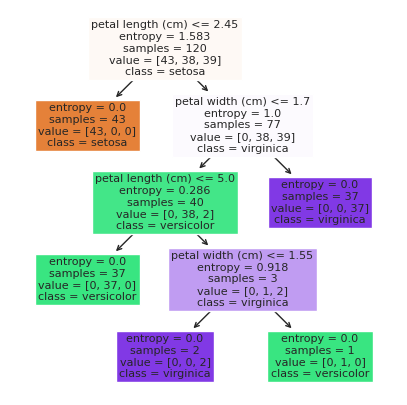

In [69]:
plt.figure(figsize=(5,5))
_ = plot_tree(tree2, feature_names=less_features,  class_names=iris.target_names, filled=True)

### Visualize the feature importance using a barplot:

Text(0.5, 1.0, 'Feature Importance')

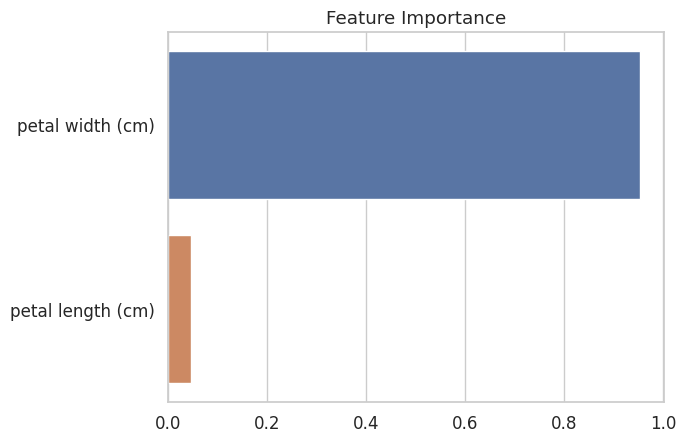

In [17]:
feature_importances2 = sorted(list(zip(tree2.feature_importances_, less_features)), reverse=True)
x = [f[0] for f in feature_importances2]
y_ = [f[1] for f in feature_importances2]

sns.barplot(x=x,y=y_)
plt.title('Feature Importance')

---

### KFolds optimization

In [18]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=7)


tree3 = DecisionTreeClassifier(criterion='entropy', random_state=7)
kfold = KFold(n_splits=10)
scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree3.fit(X_train, y_train)
    y_pred = tree3.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    scores.append(score)
   
print('Results: ')
print(f'Average accuracy: {sum(scores)/len(scores):.4f}')


Results: 
Average accuracy: 0.9333


### Comparison of different classification algorithms
The results show that the neural network performs better than the rest of the algorithms

In [107]:
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Define a list of classifiers to train and evaluate
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=7)),
    ('SVM', SVC(random_state=7)),
    ('KNN', KNeighborsClassifier()),
    ('DTree', DecisionTreeClassifier(criterion='entropy', random_state=7)),
    ('NB', CategoricalNB(force_alpha=True)),
    ('MLP', MLPClassifier(random_state=7, max_iter=600))
]

# Train and evaluate each classifier
for name, clf in classifiers:
    clf.fit(X=X_train, y=y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 score: {f1:.4f}')

    print()

Random Forest:
Accuracy: 0.8667
Precision: 0.8838
Recall: 0.8838
F1 score: 0.8838

SVM:
Accuracy: 0.8667
Precision: 0.8838
Recall: 0.8838
F1 score: 0.8838

KNN:
Accuracy: 0.9000
Precision: 0.9154
Recall: 0.9116
F1 score: 0.9124

DTree:
Accuracy: 0.9000
Precision: 0.9141
Recall: 0.9141
F1 score: 0.9130

NB:
Accuracy: 0.8667
Precision: 0.8915
Recall: 0.8813
F1 score: 0.8821

MLP:
Accuracy: 0.9667
Precision: 0.9722
Recall: 0.9722
F1 score: 0.9710



In [104]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Feature selection


In [108]:
X, y = datasets.load_iris(return_X_y=True)
#X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=7)

clf = Pipeline([
  ('feature_selection', SelectKBest(score_func=f_classif, k=3)),
  ('classification', DecisionTreeClassifier(criterion='entropy', random_state=7))
])

clf.fit(X=X_train, y=y_train)

# Get the selected feature names
feature_selection = clf.named_steps['feature_selection']
selected_feature_indices = feature_selection.get_support(indices=True)
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']  # Replace with your actual feature names
selected_feature_names = [feature_names[idx] for idx in selected_feature_indices]

print('Selected features:')
for feature_name in selected_feature_names:
    print(feature_name)
print()


y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
    
print('Results: ')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')




Selected features:
sepal length
petal length
petal width

Results: 
Accuracy: 0.8667
Precision: 0.8838
Recall: 0.8838
F1 score: 0.8838
